In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import json
import requests
import pandas as pd
import numpy as np
import os

# from api_keys import charity_search_key, just_giving_appid, charity_navigator_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# SAVING API Code for later

* API calls have limits on free accounts so chose another path on the data. But I won't remember it five weeks from now

In [2]:
# Propublica Nonprofit API Docs
# https://projects.propublica.org/nonprofits/api/
# propublica_url = "https://projects.propublica.org/nonprofits/api/v2/organizations/"
# dummy_ein = 310387145
# propublica_query = f'{propublica_url}{dummy_ein}.json'
# print(propublica_query)

# Charity Search API Docs
# http://charityapi.orghunter.com/content/charity-search-summary-api
# charity_search_url = "http://data.orghunter.com/v1/charitysearch"
# charity_search_query = f"{charity_search_url}?user_key={charity_search_key}"
# charity_search_response = requests.get(charity_search_query).json()
# charity_search_response

# JustGiving Developer Guide
# https://developer.justgiving.com/
# just_giving_url = "https://api.justgiving.com"
# just_giving_query = f"{just_giving_url}/{just_giving_appid}/v1/charity/2050" # need list comprehensions ...
# just_giving_response = requests.get(just_giving_query).json()
# just_giving_response

# Build partial query URL

In [3]:
# urls = []
# org_ein_loop = 100000000
# propublica_url = "https://projects.propublica.org/nonprofits/api/v2/organizations/"

# ein = []
# name = []
# city = []
# state = []
# ntee_code = []
# subseccd = []
# score = []


# while org_ein_loop < 1000000000: 

  #    try:
   #     propublica_query = f"{propublica_url}{org_ein_loop}.json"
    #    propublica_response = requests.get(propublica_query).json()
     #   display(propublica_query)
      #  urls.append(propublica_query)
       # org_ein_loop = org_ein_loop + 1
        
      #except ValueError: 
       # org_ein_loop = org_ein_loop + 1
        #continue

        
    # ein.append(propublica_response['total_results']['organizations']['ein'])
    # name.append(propublica_response['total_results']['organizations']['name'])
    # city.append(propublica_response['total_results']['organizations']['city'])
    # state.append(propublica_response['total_results']['organizations']['state'])
    # ntee_code.append(propublica_response['total_results']['organizations']['ntee_code'])
    #  subseccd.append(propublica_response['total_results']['organizations']['subseccd'])
    #    score.append(propublica_response['total_results']['organizations']['score'])
    
#    if propublica_response["api_version"] == 2:   
 #       display(propublica_response)
          
    
        # print('This is not the nonprofit you were looking for')

# Switching to IRS CSV

In [4]:
# https://www.irs.gov/pub/irs-soi/eo_info.pdf
# 
IRS_Nonprofits_df = pd.read_csv('data/IRS_Nonprofits.csv')
IRS_Nonprofits_df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,19818,PALMER SECOND BAPTIST CHURCH,NaN,1050 THORNDIKE ST,PALMER,MA,01069-1507,3125,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,3514
1,29215,ST GEORGE CATHEDRAL,NaN,523 E BROADWAY,SOUTH BOSTON,MA,02127-4415,2365,3,9,...,0,0,6,0,12,NaN,NaN,NaN,NaN,NaN
2,587764,IGLESIA BETHESDA INC,NaN,157 ANDOVER ST,LOWELL,MA,01852-2348,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
3,635913,MINISTERIO APOSTOLICO JESUCRISTO ES EL SENOR INC,NaN,454 ESSEX ST,LAWRENCE,MA,01840-1242,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X21,NaN
4,765634,MERCY CHAPEL INTERNATIONAL,NaN,75 MORTON VILLAGE DR APT 408,MATTAPAN,MA,02126-2433,0,3,3,...,0,0,6,0,12,NaN,NaN,NaN,X20,NaN


In [5]:
IRS_Nonprofit_zip = IRS_Nonprofits_df["ZIP"].str.split("-", n = 1, expand = True) 
IRS_Nonprofits_df["ZIP"]= IRS_Nonprofit_zip[0]
IRS_Nonprofits_df["ZIP4"]= IRS_Nonprofit_zip[1] 
IRS_Nonprofits_df.drop(columns=['ICO','STREET','GROUP','DEDUCTIBILITY','AFFILIATION','RULING','ACTIVITY','TAX_PERIOD','FILING_REQ_CD','PF_FILING_REQ_CD','SORT_NAME', 'ZIP4'], inplace=True)
IRS_Nonprofits_df.dropna(subset=['ASSET_AMT', 'INCOME_AMT', 'REVENUE_AMT', 'NTEE_CD','STATE' ], inplace=True)
IRS_Nonprofits_df.sort_values(by=['ZIP'], ascending=True, inplace=True)
IRS_Nonprofits_df.head()

,EIN,NAME,CITY,STATE,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ORGANIZATION,STATUS,ASSET_CD,INCOME_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD
250722,660423758,CENTRO PARA NINOS EL NUEVO HOGAR INC,ADJUNTAS,PR,00601,3,1200,15,1,1,4,4,12,223480.0,235372.0,235372.0,P70
252241,660872460,ASOCIACION DE RESIDENTES CAMINO PAGAN INC,ADJUNTAS,PR,00601,3,1000,16,1,1,1,1,12,1728.0,2048.0,2048.0,S20
251850,660769994,HAPPY KIDS ZONE INC,AGUADA,PR,00602,3,1000,16,1,1,0,0,12,0.0,0.0,0.0,P33
251926,660794599,EMPOWERING PEOPLE FOUNDATION CORP,AGUADA,PR,00602,3,2000,16,1,1,0,0,12,0.0,0.0,0.0,B60
251070,660528378,PROGRAMA DE APOYO Y ENLACE COMUNITARIO,AGUADA,PR,00602,3,1000,15,1,1,4,5,6,288488.0,664517.0,664517.0,P20


In [6]:
IRS_Nonprofits_df.count() # States with NaN are either US Territories (eg. Puerto Rico) or Foreign Countries.
IRS_Nonprofits_df.dtypes
num_nonprofits_by_zip = IRS_Nonprofits_df['ZIP'].value_counts()
nm_np_zip = pd.DataFrame(num_nonprofits_by_zip)
nm_np_zip.reset_index(inplace=True)
nm_np_zip.rename(columns={'index':'ZIP', 'ZIP': 'COUNT'}, inplace=True)
nm_np_zip

,ZIP,COUNT
0,20036,1032
1,20005,771
2,20001,664
3,10001,631
4,20006,611
5,22314,567
6,10018,557
7,10016,450
8,08701,449
9,10017,449


In [7]:
zip_to_latlng_df = pd.read_csv('data/us-zip-code-latitude-and-longitude.csv', sep=';', dtype={'Zip': 'str'})
zip_to_latlng_df.rename(columns={'Zip':'ZIP'}, inplace=True)
zip_to_latlng_df.drop(columns=['City','Daylight savings time flag','geopoint'], inplace=True)
zip_to_latlng_df.sort_values(by=['ZIP'], ascending=True, inplace=True)
zip_to_latlng_df.dtypes

ZIP           object
State         object
Latitude     float64
Longitude    float64
Timezone       int64
dtype: object

In [8]:
phil_count_by_zip = nm_np_zip.merge(zip_to_latlng_df, on='ZIP')
phil_count_by_zip['Latitude'] = phil_count_by_zip['Latitude'].map("{:,.2f}".format)
phil_count_by_zip['Longitude'] = phil_count_by_zip['Longitude'].map("{:,.2f}".format)
phil_count_by_zip.to_html('tables/phil_count_by_zip.htm')
display(phil_count_by_zip)

,ZIP,COUNT,State,Latitude,Longitude,Timezone
0,20036,1032,DC,38.91,-77.04,-5
1,20005,771,DC,38.90,-77.03,-5
2,20001,664,DC,38.91,-77.02,-5
3,10001,631,NY,40.75,-74.00,-5
4,20006,611,DC,38.90,-77.04,-5
5,22314,567,VA,38.81,-77.05,-5
6,10018,557,NY,40.76,-73.99,-5
7,10016,450,NY,40.75,-73.98,-5
8,08701,449,NJ,40.08,-74.21,-5
9,10017,449,NY,40.75,-73.97,-5


In [9]:
IRS_Nonprofits_latlngs = IRS_Nonprofits_df.merge(zip_to_latlng_df, on='ZIP')
Nonprofit_Analysis = IRS_Nonprofits_latlngs.loc[IRS_Nonprofits_latlngs['REVENUE_AMT'] > 0]
display(Nonprofit_Analysis.head())

Philanthropy_Analysis = Nonprofit_Analysis.loc[Nonprofit_Analysis['SUBSECTION'] == 3 ]
display(Philanthropy_Analysis.head())

,EIN,NAME,CITY,STATE,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ORGANIZATION,STATUS,...,INCOME_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,State,Latitude,Longitude,Timezone
0,660423758,CENTRO PARA NINOS EL NUEVO HOGAR INC,ADJUNTAS,PR,00601,3,1200,15,1,1,...,4,12,223480.0,235372.0,235372.0,P70,PR,18.180103,-66.74947,-4
1,660872460,ASOCIACION DE RESIDENTES CAMINO PAGAN INC,ADJUNTAS,PR,00601,3,1000,16,1,1,...,1,12,1728.0,2048.0,2048.0,S20,PR,18.180103,-66.74947,-4
4,660528378,PROGRAMA DE APOYO Y ENLACE COMUNITARIO,AGUADA,PR,00602,3,1000,15,1,1,...,5,6,288488.0,664517.0,664517.0,P20,PR,18.363285,-67.18024,-4
7,660514087,ABC INFANTIL INC,AGUADA,PR,00602,3,1000,16,1,1,...,2,12,316893.0,14048.0,14048.0,P33,PR,18.363285,-67.18024,-4
11,660587983,ADVANCED BILINGUAL SCHOOL INC,AGUADILLA,PR,00603,3,1200,11,1,1,...,3,12,512873.0,59689.0,59689.0,B20,PR,18.448619,-67.13422,-4


,EIN,NAME,CITY,STATE,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ORGANIZATION,STATUS,...,INCOME_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,State,Latitude,Longitude,Timezone
0,660423758,CENTRO PARA NINOS EL NUEVO HOGAR INC,ADJUNTAS,PR,00601,3,1200,15,1,1,...,4,12,223480.0,235372.0,235372.0,P70,PR,18.180103,-66.74947,-4
1,660872460,ASOCIACION DE RESIDENTES CAMINO PAGAN INC,ADJUNTAS,PR,00601,3,1000,16,1,1,...,1,12,1728.0,2048.0,2048.0,S20,PR,18.180103,-66.74947,-4
4,660528378,PROGRAMA DE APOYO Y ENLACE COMUNITARIO,AGUADA,PR,00602,3,1000,15,1,1,...,5,6,288488.0,664517.0,664517.0,P20,PR,18.363285,-67.18024,-4
7,660514087,ABC INFANTIL INC,AGUADA,PR,00602,3,1000,16,1,1,...,2,12,316893.0,14048.0,14048.0,P33,PR,18.363285,-67.18024,-4
11,660587983,ADVANCED BILINGUAL SCHOOL INC,AGUADILLA,PR,00603,3,1200,11,1,1,...,3,12,512873.0,59689.0,59689.0,B20,PR,18.448619,-67.13422,-4


In [10]:
state_pop_df = pd.read_csv('data/state_pop.csv')
state_pop = state_pop_df[['POP_est_2018', 'STATE']]
state_pop.head()

,POP_est_2018,STATE
0,4887871,AL
1,737438,AK
2,55641,AS
3,7171646,AZ
4,3013825,AR


In [11]:
phil_org_count = Philanthropy_Analysis.groupby('STATE')['NAME'].count()
phil_org_counts = pd.DataFrame(phil_org_count)
phil_org_counts.rename(columns = {'NAME':'Num_of_Orgs'}, inplace=True)
display(phil_org_counts.head())

,Num_of_Orgs
STATE,
AK,1152
AL,3820
AP,2
AR,2552
AS,9


In [12]:

Philanthropy_Analysis = Philanthropy_Analysis.groupby('STATE')['REVENUE_AMT'].sum()
philanthropy_revenue_bystate = pd.DataFrame(Philanthropy_Analysis)
phil_rev_by_state = philanthropy_revenue_bystate.sort_values('REVENUE_AMT')
display(phil_rev_by_state.head())


,REVENUE_AMT
STATE,
AP,1.446290e+05
AS,2.770525e+06
VI,7.763066e+07
WY,1.138662e+09
PR,2.226544e+09


In [22]:
phil_rev_pop_by_state = pd.merge(phil_rev_by_state, state_pop, on='STATE')
phil_rev_pop_by_state['REV_PerCap'] = phil_rev_pop_by_state['REVENUE_AMT'] / phil_rev_pop_by_state['POP_est_2018'] # in billions
phil_rev_pop_by_state = phil_rev_pop_by_state.sort_values('REV_PerCap', ascending=False)
phil_rev_pop_by_state_orgs = pd.merge(phil_rev_pop_by_state, phil_org_counts, on='STATE')
display(phil_rev_pop_by_state_orgs.head())
phil_rev_cap_state_org = phil_rev_pop_by_state_orgs['REV_PerCap'].describe()
display(pd.DataFrame(phil_rev_cap_state_org))

,STATE,REVENUE_AMT,POP_est_2018,REV_PerCap,Num_of_Orgs
0,DC,3.579749e+10,702455,50960.547259,3711
1,OR,6.282227e+10,4190713,14990.831057,5377
2,MA,1.026032e+11,6902149,14865.398471,11504
3,NY,2.156073e+11,19542209,11032.902670,25627
4,RI,1.154417e+10,1057315,10918.378792,1354


,REV_PerCap
count,54.000000
mean,6385.526816
std,6948.016530
min,49.792869
25%,3286.766154
50%,5110.403205
75%,6762.575428
max,50960.547259


In [23]:
phil_format = phil_rev_pop_by_state_orgs
phil_format['REVENUE_AMT'] = phil_format['REVENUE_AMT'] / 10000000
phil_format['avg_Org_Rev'] = (phil_format['REVENUE_AMT'] / phil_format['Num_of_Orgs']) * 1000000
phil_format_scatter = phil_format
phil_format_scatter

,STATE,REVENUE_AMT,POP_est_2018,REV_PerCap,Num_of_Orgs,avg_Org_Rev
0,DC,3579.749122,702455,50960.547259,3711,9.646319e+05
1,OR,6282.227059,4190713,14990.831057,5377,1.168352e+06
2,MA,10260.319519,6902149,14865.398471,11504,8.918915e+05
3,NY,21560.728986,19542209,11032.902670,25627,8.413286e+05
4,RI,1154.416567,1057315,10918.378792,1354,8.525972e+05
5,MN,6004.440445,5611179,10700.853501,7290,8.236544e+05
6,VT,639.932242,626299,10217.679442,1458,4.389110e+05
7,ME,1266.892068,1338404,9465.692484,2063,6.141018e+05
8,CT,3101.799457,3572665,8682.032761,4452,6.967205e+05
9,OH,9324.905536,11689442,7977.203306,11893,7.840667e+05


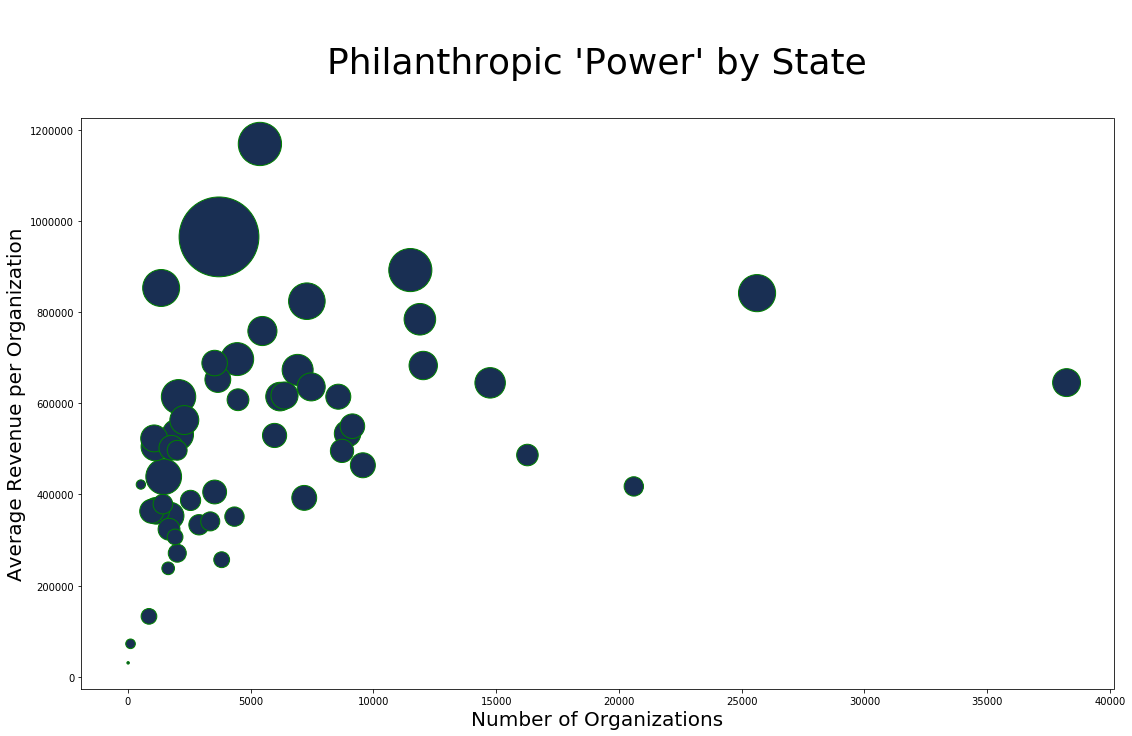

In [15]:
plt.figure(figsize=(18.5,10.5))

plt.scatter(phil_format_scatter['Num_of_Orgs'], phil_format_scatter['avg_Org_Rev'],  
            marker="o", facecolors="#192f53", edgecolors='green', s=phil_format_scatter['REV_PerCap'] / 8) 

plt.title("\nPhilanthropic 'Power' by State\n", fontsize=36)
plt.xlabel("Number of Organizations", fontsize=20)
plt.ylabel("Average Revenue per Organization", fontsize=20)
plt.savefig("images/phil_by_rev.png")
plt.show()

In [16]:

phil_format['REV_PerCap'] = phil_format['REV_PerCap'].map("${:,.2f}".format)
phil_format['POP_est_2018'] = phil_format['POP_est_2018'].map("{:,.0f}".format)
phil_format['REVENUE_AMT'] = phil_format['REVENUE_AMT'].map("${:,.2f}".format)
phil_format['avg_Org_Rev'] = phil_format['avg_Org_Rev'].map("${:,.2f}".format)
phil_format.rename(columns={'REVENUE_AMT':'REV_inMillions'}, inplace=True)
phil_htmltable = phil_format.to_html('tables/philanthropy_summary.htm')
phil_format

,STATE,REV_inMillions,POP_est_2018,REV_PerCap,Num_of_Orgs,avg_Org_Rev
0,DC,"$3,579.75","702,455","$50,960.55",3711,"$964,631.94"
1,OR,"$6,282.23","4,190,713","$14,990.83",5377,"$1,168,351.69"
2,MA,"$10,260.32","6,902,149","$14,865.40",11504,"$891,891.47"
3,NY,"$21,560.73","19,542,209","$11,032.90",25627,"$841,328.64"
4,RI,"$1,154.42","1,057,315","$10,918.38",1354,"$852,597.17"
5,MN,"$6,004.44","5,611,179","$10,700.85",7290,"$823,654.38"
6,VT,$639.93,"626,299","$10,217.68",1458,"$438,911.00"
7,ME,"$1,266.89","1,338,404","$9,465.69",2063,"$614,101.83"
8,CT,"$3,101.80","3,572,665","$8,682.03",4452,"$696,720.45"
9,OH,"$9,324.91","11,689,442","$7,977.20",11893,"$784,066.72"


In [17]:
print(phil_format.to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>STATE</th>
      <th>REV_inMillions</th>
      <th>POP_est_2018</th>
      <th>REV_PerCap</th>
      <th>Num_of_Orgs</th>
      <th>avg_Org_Rev</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>DC</td>
      <td>$3,579.75</td>
      <td>702,455</td>
      <td>$50,960.55</td>
      <td>3711</td>
      <td>$964,631.94</td>
    </tr>
    <tr>
      <th>1</th>
      <td>OR</td>
      <td>$6,282.23</td>
      <td>4,190,713</td>
      <td>$14,990.83</td>
      <td>5377</td>
      <td>$1,168,351.69</td>
    </tr>
    <tr>
      <th>2</th>
      <td>MA</td>
      <td>$10,260.32</td>
      <td>6,902,149</td>
      <td>$14,865.40</td>
      <td>11504</td>
      <td>$891,891.47</td>
    </tr>
    <tr>
      <th>3</th>
      <td>NY</td>
      <td>$21,560.73</td>
      <td>19,542,209</td>
      <td>$11,032.90</td>
      <td>25627</td>
      <td>$841,328.64</td>
    </tr

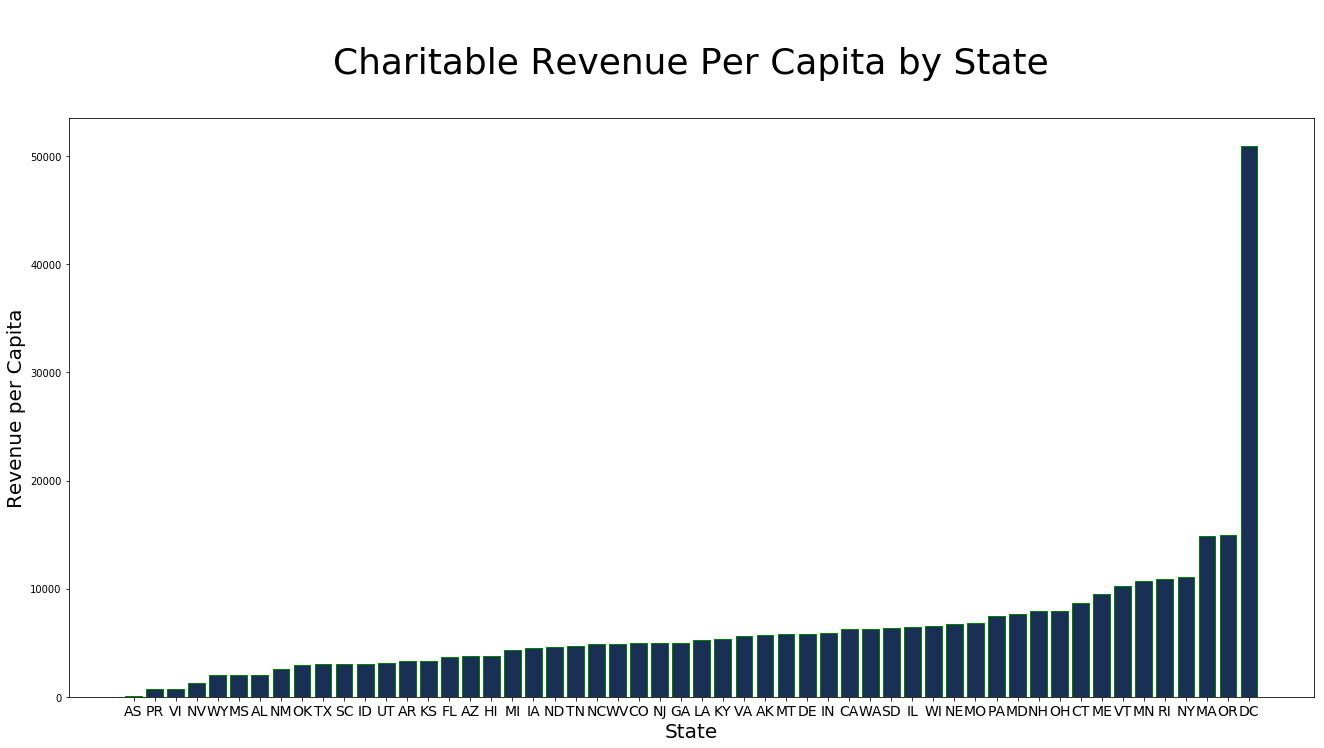

In [18]:
fig, ax = plt.subplots()
xpos = range(1, len(phil_rev_pop_by_state['STATE'])+1)
ax.bar(xpos, phil_rev_pop_by_state['REV_PerCap'][::-1],edgecolor='green', color='#192f53')
ax.set_xlabel("State", fontsize=20)
ax.set_ylabel("Revenue per Capita", fontsize=20)
ax.set_xticks(xpos)
# ax.set_yticks(ypos)
ax.set_xticklabels(phil_rev_pop_by_state['STATE'][::-1], fontsize=14)
ax.set_title("\nCharitable Revenue Per Capita by State\n" , fontsize=36)
fig.set_size_inches(18.5, 10.5)
fig.tight_layout()
plt.savefig("images/phil_rev_state.png")
plt.show()

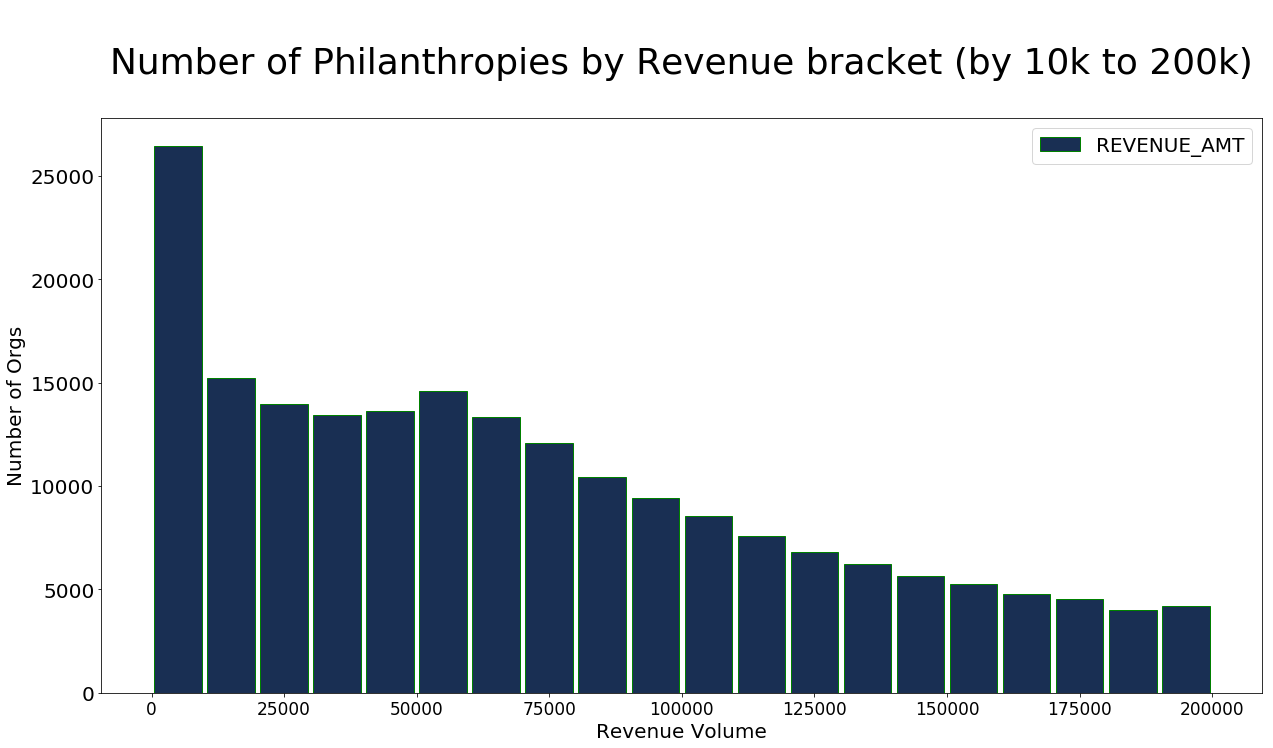

In [19]:
Nonprofit_Analysis['REVENUE_AMT'].plot.hist(by=None, bins=[0,10000,20000, 30000, 40000, 50000, 60000, 70000,\
                                                           80000, 90000, 100000, 110000, 120000, 130000, 140000,\
                                                           150000, 160000, 170000, 180000, 190000, 200000],\
                                            figsize=(18.5, 10.5), color='#192f53', rwidth=0.9, fontsize=17, 
                                            edgecolor='green')

plt.title('\nNumber of Philanthropies by Revenue bracket (by 10k to 200k)\n', fontsize=36)
plt.xlabel('Revenue Volume', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Number of Orgs', fontsize=20)
plt.legend(loc='best', prop={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.tight_layout()
plt.savefig("images/nonprofits_by_income.png")
plt.show()
plt.close()

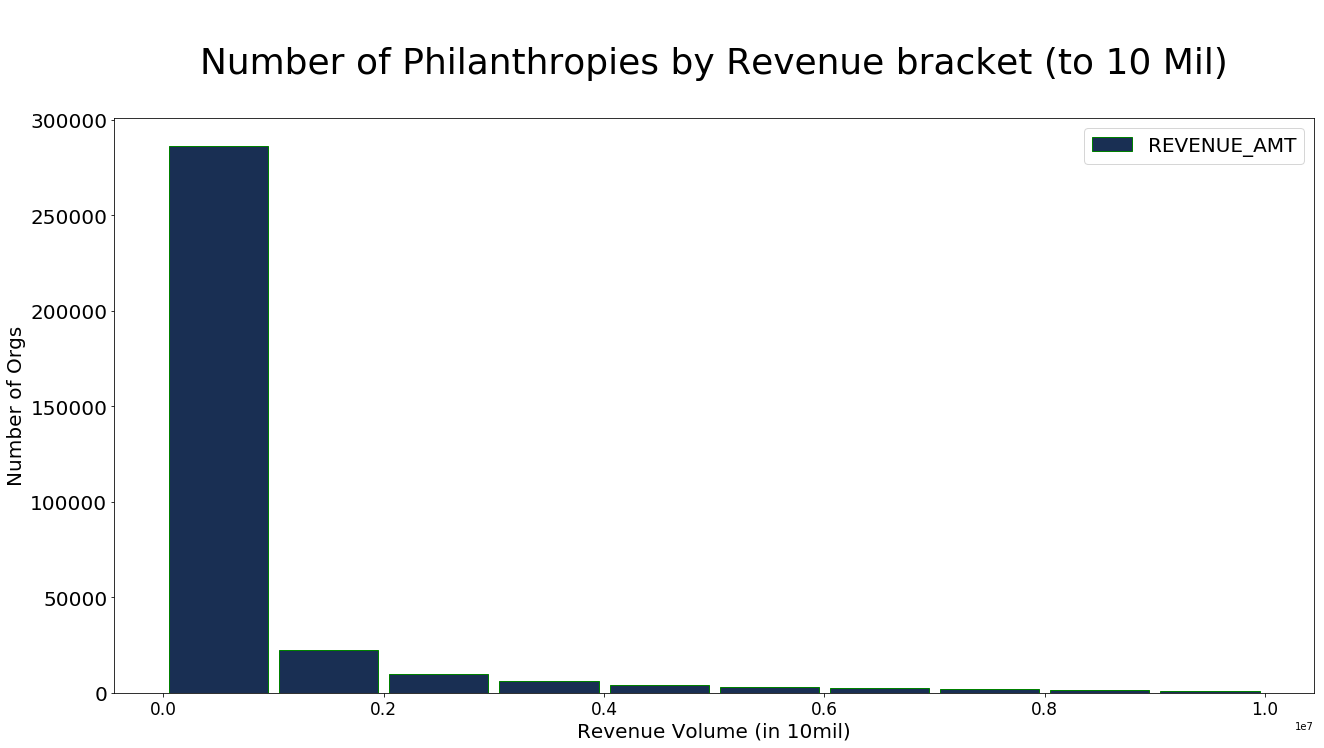

In [27]:
Nonprofit_Analysis['REVENUE_AMT'].plot.hist(by=None, bins=[0,1000000,2000000, 3000000, 4000000, 5000000, 
                                                           6000000, 7000000,8000000, 9000000,10000000  ],
                                            figsize=(18.5, 10.5), color='#192f53', rwidth=0.9, fontsize=17, 
                                            edgecolor='green')

plt.title('\nNumber of Philanthropies by Revenue bracket (to 10 Mil)\n', fontsize=36)
plt.xlabel('Revenue Volume (in 10mil)', fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Number of Orgs', fontsize=20)
plt.legend(loc='best', prop={'size': 20})
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

plt.tight_layout()
plt.savefig("images/nonprofits_high_rollers.png")
plt.show()
plt.close()

In [28]:
top_Nonprofit_Analysis = IRS_Nonprofits_latlngs.loc[IRS_Nonprofits_latlngs['REVENUE_AMT'] > 1000000]
top_Nonprofit_Analysis

,EIN,NAME,CITY,STATE,ZIP,SUBSECTION,CLASSIFICATION,FOUNDATION,ORGANIZATION,STATUS,...,INCOME_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,State,Latitude,Longitude,Timezone
12,660541904,CASA DEL PEREGRINO,AGUADILLA,PR,00603,3,1200,15,1,1,...,6,10,1715053.0,1124261.0,1124261.0,P85,PR,18.448619,-67.134220,-4
13,660437360,ESCUELA FEDERICO FROEBEL INC,AGUADILLA,PR,00604,3,2000,11,1,1,...,6,12,1580271.0,1324631.0,1324631.0,B20,PR,18.498987,-67.136990,-4
16,660439432,UNIVERSAL TECHNOLOGY COLLEGE OF PR INC,AGUADILLA,PR,00605,3,2000,11,1,1,...,7,9,10178977.0,5515617.0,3381246.0,B30,PR,18.465162,-67.141486,-4
21,660571457,HOSPITAL COMUNITARIO BUEN SAMARITANO INC,AGUADILLA,PR,00605,3,1000,12,1,1,...,8,12,29093375.0,29750470.0,29750470.0,E20,PR,18.465162,-67.141486,-4
30,660320329,HOGAR COLEGIO LA MILAGROSA,ARECIBO,PR,00612,3,2000,11,1,1,...,6,6,247257.0,1006822.0,1006822.0,B20,PR,18.449732,-66.698790,-4
35,660428997,CENTRO DE SERVICIOS A LA JUVENTUD INC,ARECIBO,PR,00613,3,1000,15,1,1,...,7,9,1355384.0,5457603.0,5457603.0,P300,PR,18.458093,-66.732732,-4
52,660270259,COOPERATIVA DE CREDITO CABO ROJO,CABO ROJO,PR,00623,14,1000,0,1,1,...,7,12,151960936.0,7921630.0,7921630.0,W61,PR,18.086430,-67.152220,-4
58,660428120,PRYMED MEDICAL CARE INC,CIALES,PR,00638,3,1000,12,1,1,...,8,1,15430234.0,12964651.0,12964651.0,E20Z,PR,18.308139,-66.498350,-4
64,660743234,TASIS DORADO EDUCATIONAL FOUNDATION INC,DORADO,PR,00646,3,1000,11,1,1,...,8,6,11683446.0,10953611.0,10953611.0,B20,PR,18.442798,-66.276890,-4
73,660726399,CARLOS BELTRAN BASEBALL ACADEMY INC,FLORIDA,PR,00650,3,2000,11,1,1,...,6,12,3764913.0,1124615.0,1124615.0,N63,PR,18.363331,-66.567730,-4


/Users/stephenmonteiro/anaconda3/envs/PythonDataScience/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/stephenmonteiro/anaconda3/envs/PythonDataScience/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


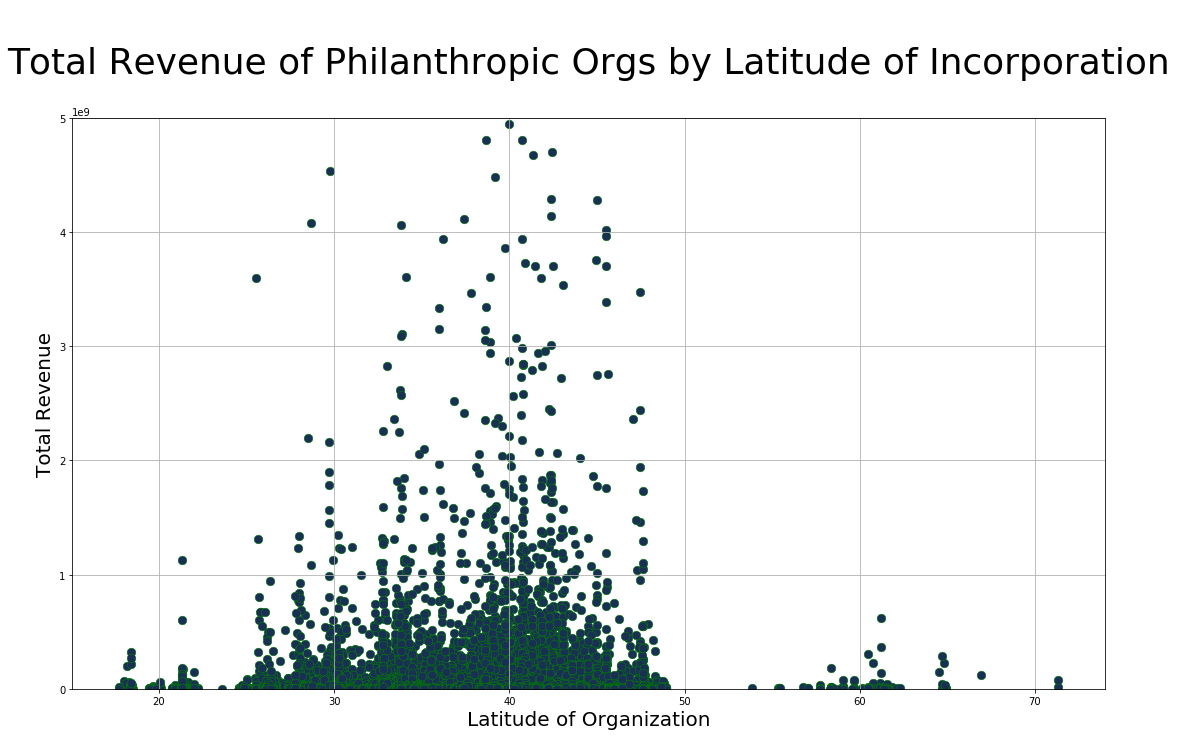

In [29]:
ytix = []

top_Nonprofit_Analysis['Latitude'] = pd.to_numeric(top_Nonprofit_Analysis['Latitude'])
top_Nonprofit_Analysis['Revenue'] = pd.to_numeric(top_Nonprofit_Analysis['REVENUE_AMT'])

top_Nonprofit_Analysis.plot(kind='scatter', x='Latitude', y='Revenue', 
                    marker="o", grid=True, figsize=(18.5, 10.5), linewidths = 0.50, 
                    edgecolors='green', color='#192f53', s=75,)

plt.title("\nTotal Revenue of Philanthropic Orgs by Latitude of Incorporation\n", fontsize=36)
plt.xlabel("Latitude of Organization", fontsize=20)
plt.ylabel("Total Revenue", fontsize=20)
plt.ylim(bottom=0, top=5000000000)
#plt.yticks(np.arange(0, 2, step=1))
plt.savefig('images/philanthropic_directions.png', dpi=None, transparent=False,)
plt.show()

